Link: https://drive.google.com/drive/folders/1zKTc2r2Dp-cOVKOQ0K0h3Ug2AbgIKA9a?usp=drive_link

# Iris Dataset Classification using K-Nearest Neighbour (KNN)

In this notebook, we will build a classifier using the **K-Nearest Neighbors (KNN)** algorithm to classify iris flowers into three species:
- Setosa
- Versicolor
- Virginica

The dataset contains 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width

## Step 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Initialise Data

In [16]:
iris = pd.read_csv("./data/iris.csv")
iris.head()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

We can see that the dataset includes four numerical features and a target column `species`.

In [17]:
iris["species"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

We can see each species has 50 datas

## Step 3: Data visualization

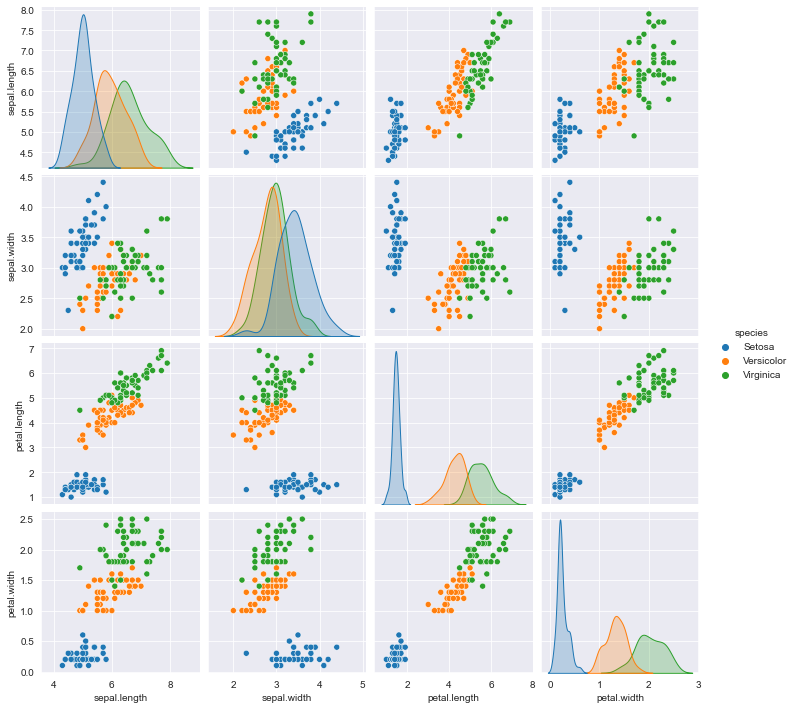

In [4]:
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.show()

From the visualization, we can observe that petal length and petal width provide good separation between classes.

## Step 4: Data preparation

In [5]:
X = iris.drop('species', axis=1)
y = iris['species']
#split, train:test = 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#use scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5: Train KNN classifier

In [29]:
#train knn with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
#prediction
y_pred = knn.predict(X_test_scaled)

## Step 6: Model evaluation

Accuracy:  1.0
Classification: 
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



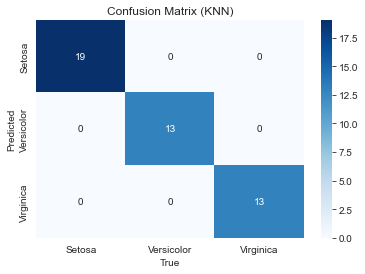

In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification: \n", classification_report(y_test, y_pred))
#confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Confusion Matrix (KNN)")
plt.show()

## Conclusion

- KNN classifier works well on the iris dataset.
- The accuracy is 97%+ with the right choice of k.
- Petal length and petal width are the most discriminative features for classification.